<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.16

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

A batch bioreactor is used to the production of biomass and product under de following conditions 

*(i)* Initial conditions 

$X(0) = 0.05\ g/L$, $S(0) = 10\ g/L$, $P(0) = 0\ g/L$

*(ii)* Parameter values: 

$V = 1\ L$, $\mu_{max} = 0.20\ h^{-1}$, $K_s = 1.0\ g/L$

$Y_{X/S} = 0.5\ g/g$, $Y_{P/X} = 0.2\ g/g$

Using the available information determine how much time is required to achive a 90% convertion of the substrate

### 2. Assumptions

* Constant volume

* Constant temperature

* Kinetic parameters constant

* Homogenious concentration in the bioreactor 

### 3. Process scheme 

### 4. Analysis 

#### Establish the model 
Specie balance for X

$$
\frac{d(VX)}{dt} = r_g V
$$

$$
\frac{dX}{dt} = \mu_{max} \frac{S}{K_s + S} X \tag{1}
$$

Specie balance for S

$$
\frac{d(VS)}{dt} = - r_s 
$$

$$
\frac{dS}{dt} = - \frac{1}{Y_{X/S}} \mu_{max} \frac{S}{K_s + S} X  \tag{2}
$$

Specie balance for P

$$
\frac{d(VP)}{dt} = r_p V
$$

$$
\frac{dP}{dt} = Y_{P/X} \mu_{max}\frac{S}{K_s + S} X \tag{3}
$$

In this case, there is no steady state conditions different from the trivial ones 

#### Degrees of freedon analysis 

state variables: X, S, P (3)

equations: 3 DE (3)

degrees of freedon: 3 - 3 = 0

inputs: there are no inputs

parameters: mu_max, Ks, Yxs, Ypx

#### Simulation 

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

In [4]:
# write the model 
def bioreactor(state,t,parms):

    # state variables
    x = state[0]
    s = state[1]
    p = state[2]

    # parameters 
    mu_max = parms[0]
    ks = parms[1]
    Yxs = parms[2]
    Ypx = parms[3]

    # growth rate 
    rg = mu_max*s/(ks+s)*x

    # specie balance for X
    dxdt = rg 

    # specie balance for S
    dsdt = -1/Yxs*rg

    # specie balance for P
    dpdt = Ypx*rg

    return [dxdt, dsdt, dpdt]

In [5]:
# establish parameters
# parameters 
mu_max = 0.20
ks = 1.0
Yxs = 0.5
Ypx = 0.2
parms = [mu_max, ks, Yxs, Ypx]

In [6]:
# establish initial conditions 
x = 0.05
s = 10
p = 0
state = [x, s, p]

In [11]:
# set integration time 
time = np.linspace(0,40,100)

In [12]:
# solve ODEs
out = odeint(bioreactor,state,time, args=(parms,))

In [16]:
x = out[:,0]
s = out[:,1]
p = out[:,2]
s_obj = np.ones(len(time))

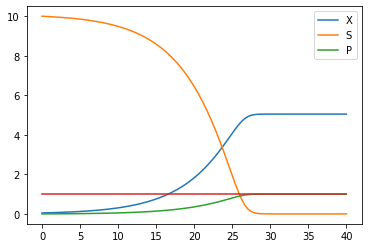

In [18]:
plt.plot(time,x,time,s,time,p,time,s_obj)
plt.legend(["X","S","P"])

it takes around 26 hours to consume 90% of the substrate 

1.0